In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import math
from gauss import *
from crank_diffusion import *

%matplotlib inline

%load_ext autoreload
%autoreload 2

np.set_printoptions(precision=3)

In [2]:
interpolations = ['none', 'nearest', 'bilinear', 'bicubic', 'spline16', 'lanczos']

def show_color_map(array, interpolation = 'nearest'):
    fig = plt.figure(figsize=(8, 8))

    plt.imshow(np.flipud(array.T), interpolation=interpolation)
    plt.show()


In [3]:
#number of points
T = 1   #конечное время
L = 1   #длина, дана в условии
D = 1   #множитель в ур-е диффузии

N_x = 10   #количество горизонтальных разбиений
N_t = 10   #количество шагов по t

In [7]:
heat_map = np.zeros((N_x, N_t), dtype = np.float64)
heat_map[0, :] = 0
heat_map[N_x - 1, :] = 0
for i in range(N_x):
    x = i/(N_x-1) * L
    heat_map[i, 0] = x *(1 - i/(N_x-1))

In [8]:
res = solve_crank_nicolson(heat_map, D, L, T, N_x, N_t)

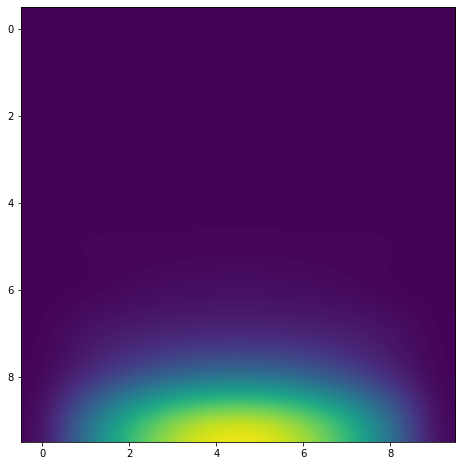

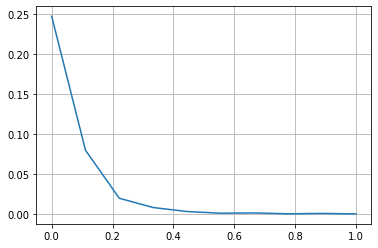

In [9]:
#show_color_map(res, interpolations[1])
show_color_map(res, interpolations[3])

dt = T/(N_t - 1)
plt.plot([dt * i for i in range(N_t)], [max(res[:, i]) for i in range(N_t)])
plt.grid()
plt.show()